In [40]:
%matplotlib inline

import numpy as np
import pydicom
import os
import matplotlib.pyplot as plt
from glob import glob
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import scipy.ndimage
from skimage import morphology
from skimage import measure
from skimage.transform import resize
from sklearn.cluster import KMeans
from livelossplot import PlotLossesKeras

from skimage.io import *


In [41]:
def Read_scan(path,verbosity = False):
    scan,ids =[],[]
    skiped_files=[]
    for root, dirs, files in os.walk(os.path.join(path)):
        print(root)
        for file in files:
            try:
                temp_file = pydicom.read_file(os.path.join(root, file), force=True)
                temp_file.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
                temp_mod = temp_file.Modality
                scan.append(temp_file)
                ids.append(temp_file.SeriesInstanceUID)

                if (temp_mod == 'RTSTRUCT') or (temp_mod == 'RTPLAN') or (temp_mod == 'RTDOSE'):
                    scan.remove(temp_file)
            except:
                skiped_files.append(file)
    
    try:
        series_id = np.unique(ids)[0]
        for sc in scan:
            if sc.SeriesInstanceUID != series_id and verbosity:
                scan.remove(sc)
                print('Scan with different ID removed')
                
        scan.sort(key = lambda x: int(x.ImagePositionPatient[2]))
                
        
    except:
        print('Some problems with sorting scans')
        

    image = np.stack([s.pixel_array for s in scan])
    return image.astype(np.int16)  
    

def apply_window(img,WW,WL,verbosity=True):
    new_img = img.copy()

#     WW = 1600
#     WL = -900
    
    WW = 1000
    WL = 40
    print(WW,WL)
    up_lim,low_lim = WL+WW/2,WL-WW/2
    if low_lim< -1500:
        low_lim = -1500
    if verbosity:
        print('Window limits ',low_lim,up_lim)   
    new_img[np.where(img<low_lim)] = low_lim
    new_img[np.where(img>up_lim)] = up_lim
    return new_img

set()
Stanford_testing\Lung-Stanford-002
1000 40
Window limits  -460.0 540.0


C:\Users\jinren\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:53: UserWarning: data\test\Lung-Stanford-002.png is a low contrast image
Lossy conversion from int16 to uint8. Range [0, 540]. Convert image to uint8 prior to saving to suppress this warning.


(205, 512, 512)
(300, 300, 3)
set()
Stanford_testing\Lung-Stanford-014
1000 40
Window limits  -460.0 540.0


C:\Users\jinren\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:53: UserWarning: data\test\Lung-Stanford-014.png is a low contrast image
Lossy conversion from int16 to uint8. Range [0, 540]. Convert image to uint8 prior to saving to suppress this warning.


(205, 512, 512)
(300, 300, 3)
set()
Stanford_testing\Lung-Stanford-028
1000 40
Window limits  -460.0 540.0


C:\Users\jinren\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:53: UserWarning: data\test\Lung-Stanford-028.png is a low contrast image
Lossy conversion from int16 to uint8. Range [0, 540]. Convert image to uint8 prior to saving to suppress this warning.


(257, 512, 512)
(300, 300, 3)
set()
Stanford_testing\Lung-Stanford-035
1000 40
Window limits  -460.0 540.0


C:\Users\jinren\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:53: UserWarning: data\test\Lung-Stanford-035.png is a low contrast image
Lossy conversion from int16 to uint8. Range [0, 540]. Convert image to uint8 prior to saving to suppress this warning.


(257, 512, 512)
(300, 300, 3)
set()
Stanford_testing\Lung-Stanford-039
1000 40
Window limits  -460.0 540.0


C:\Users\jinren\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:53: UserWarning: data\test\Lung-Stanford-039.png is a low contrast image
Lossy conversion from int16 to uint8. Range [0, 540]. Convert image to uint8 prior to saving to suppress this warning.


(125, 512, 512)
(300, 300, 3)
set()
Stanford_testing\Lung-Stanford-045
1000 40
Window limits  -460.0 540.0


C:\Users\jinren\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:53: UserWarning: data\test\Lung-Stanford-045.png is a low contrast image
Lossy conversion from int16 to uint8. Range [0, 540]. Convert image to uint8 prior to saving to suppress this warning.


(257, 512, 512)
(300, 300, 3)
set()
Stanford_testing\Lung-Stanford-050
1000 40
Window limits  -460.0 540.0


C:\Users\jinren\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\jinren\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:53: UserWarning: data\test\Lung-Stanford-050.png is a low contrast image
Lossy conversion from int16 to uint8. Range [0, 540]. Convert image to uint8 prior to saving to suppress this warning.


(263, 512, 512)
(300, 300, 3)
set()
Stanford_testing\Lung-Stanford-068
1000 40
Window limits  -460.0 540.0


C:\Users\jinren\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\jinren\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\jinren\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:53: UserWarning: data\test\Lung-Stanford-068.png is a low contrast image
Lossy conversion from int16 to uint8. Range [0, 540]. Convert image to uint8 prior to s

(298, 512, 512)
(300, 300, 3)
set()
Stanford_testing\Lung-Stanford-075
1000 40
Window limits  -460.0 540.0


C:\Users\jinren\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:53: UserWarning: data\test\Lung-Stanford-075.png is a low contrast image
Lossy conversion from int16 to uint8. Range [0, 540]. Convert image to uint8 prior to saving to suppress this warning.


(263, 512, 512)
(300, 300, 3)
set()
Stanford_testing\Lung-Stanford-081
1000 40
Window limits  -460.0 540.0


C:\Users\jinren\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:53: UserWarning: data\test\Lung-Stanford-081.png is a low contrast image
Lossy conversion from int16 to uint8. Range [0, 540]. Convert image to uint8 prior to saving to suppress this warning.


(215, 512, 512)
(300, 300, 3)
set()
Stanford_testing\Lung-Stanford-098
1000 40
Window limits  -460.0 540.0


C:\Users\jinren\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:53: UserWarning: data\test\Lung-Stanford-098.png is a low contrast image
Lossy conversion from int16 to uint8. Range [4, 540]. Convert image to uint8 prior to saving to suppress this warning.


(320, 512, 512)
(300, 300, 3)
set()
Stanford_testing\Lung-Stanford-102
1000 40
Window limits  -460.0 540.0


C:\Users\jinren\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:53: UserWarning: data\test\Lung-Stanford-102.png is a low contrast image
Lossy conversion from int16 to uint8. Range [0, 540]. Convert image to uint8 prior to saving to suppress this warning.


(299, 512, 512)
(300, 300, 3)
set()
Stanford_testing\Lung-Stanford-105
1000 40
Window limits  -460.0 540.0


C:\Users\jinren\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:53: UserWarning: data\test\Lung-Stanford-105.png is a low contrast image
Lossy conversion from int16 to uint8. Range [-460, 540]. Convert image to uint8 prior to saving to suppress this warning.


(195, 512, 512)
(300, 300, 3)
set()
Stanford_testing\Lung-Stanford-108
1000 40
Window limits  -460.0 540.0


C:\Users\jinren\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:53: UserWarning: data\test\Lung-Stanford-108.png is a low contrast image
Lossy conversion from int16 to uint8. Range [0, 540]. Convert image to uint8 prior to saving to suppress this warning.


(551, 512, 512)
(300, 300, 3)
set()
Stanford_testing\Lung-Stanford-110
1000 40
Window limits  -460.0 540.0


C:\Users\jinren\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:53: UserWarning: data\test\Lung-Stanford-110.png is a low contrast image
Lossy conversion from int16 to uint8. Range [0, 540]. Convert image to uint8 prior to saving to suppress this warning.


(247, 512, 512)
(300, 300, 3)
set()
Stanford_testing\Lung-Stanford-117
1000 40
Window limits  -460.0 540.0


C:\Users\jinren\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:53: UserWarning: data\test\Lung-Stanford-117.png is a low contrast image
Lossy conversion from int16 to uint8. Range [0, 540]. Convert image to uint8 prior to saving to suppress this warning.


(247, 512, 512)
(300, 300, 3)
set()
Stanford_testing\Lung-Stanford-118
1000 40
Window limits  -460.0 540.0


C:\Users\jinren\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:53: UserWarning: data\test\Lung-Stanford-118.png is a low contrast image
Lossy conversion from int16 to uint8. Range [0, 540]. Convert image to uint8 prior to saving to suppress this warning.


(247, 512, 512)
(300, 300, 3)
set()
Stanford_testing\Lung-Stanford-124
1000 40
Window limits  -460.0 540.0


C:\Users\jinren\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:53: UserWarning: data\test\Lung-Stanford-124.png is a low contrast image
Lossy conversion from int16 to uint8. Range [0, 540]. Convert image to uint8 prior to saving to suppress this warning.


(247, 512, 512)
(300, 300, 3)
set()
Stanford_testing\Lung-Stanford-130
1000 40
Window limits  -460.0 540.0


C:\Users\jinren\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:53: UserWarning: data\test\Lung-Stanford-130.png is a low contrast image
Lossy conversion from int16 to uint8. Range [-460, 540]. Convert image to uint8 prior to saving to suppress this warning.


(311, 512, 512)
(300, 300, 3)
set()
Stanford_testing\Lung-Stanford-136
1000 40
Window limits  -460.0 540.0


C:\Users\jinren\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:53: UserWarning: data\test\Lung-Stanford-136.png is a low contrast image
Lossy conversion from int16 to uint8. Range [0, 540]. Convert image to uint8 prior to saving to suppress this warning.


(218, 512, 512)
(300, 300, 3)


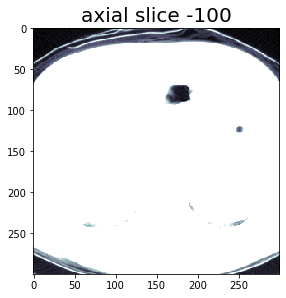

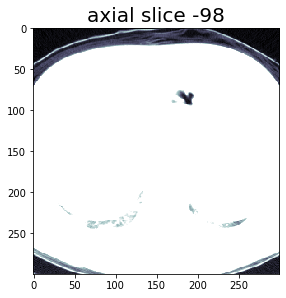

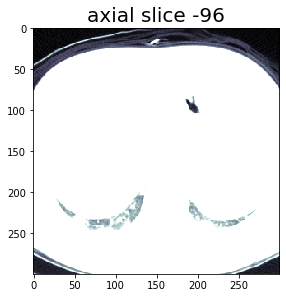

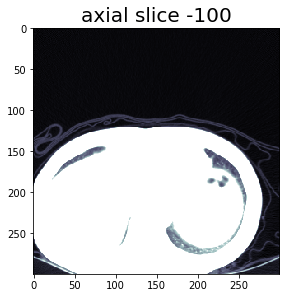

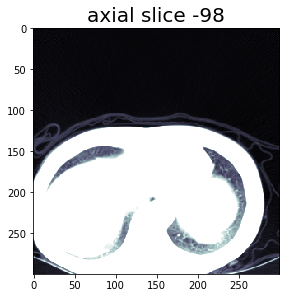

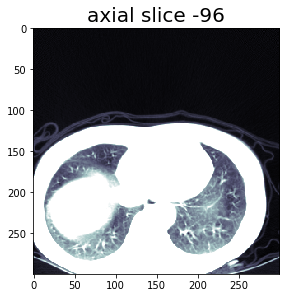

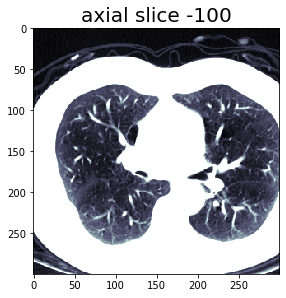

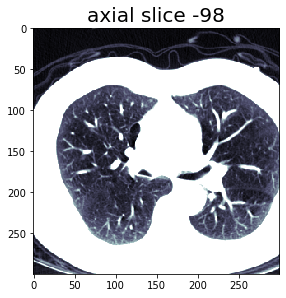

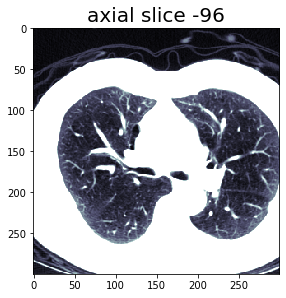

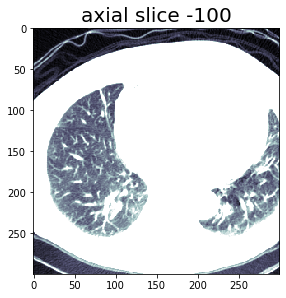

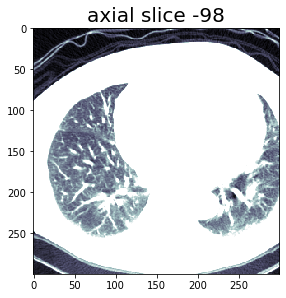

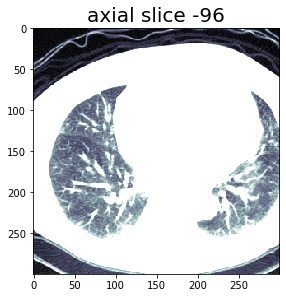

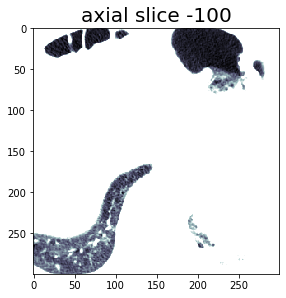

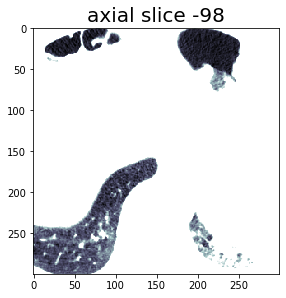

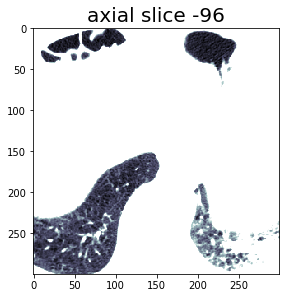

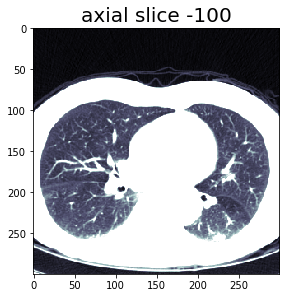

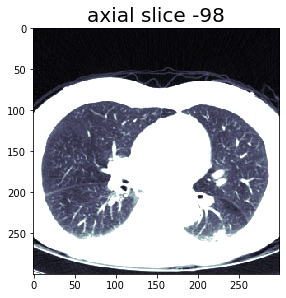

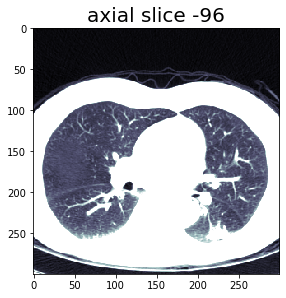

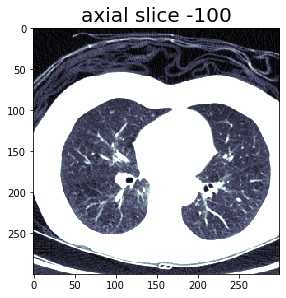

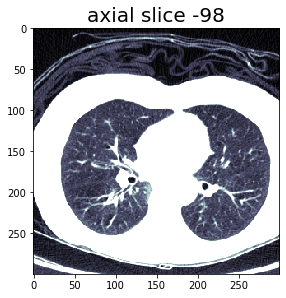

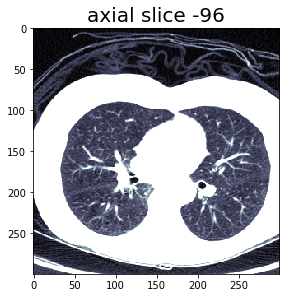

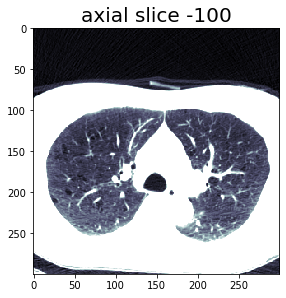

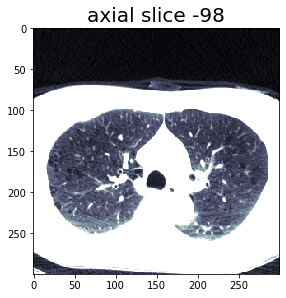

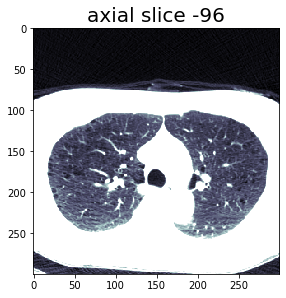

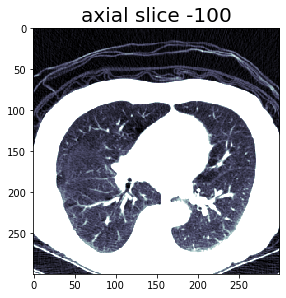

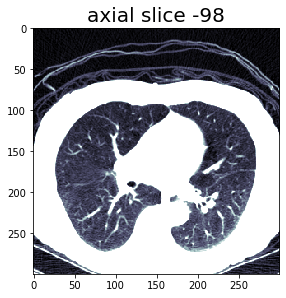

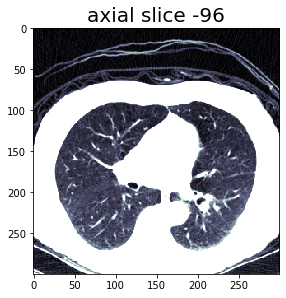

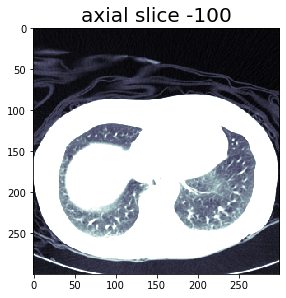

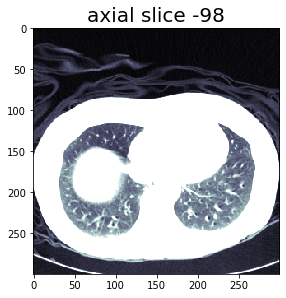

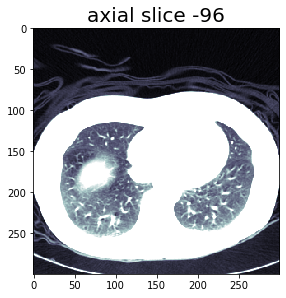

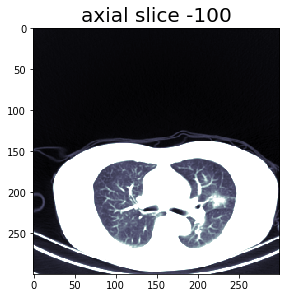

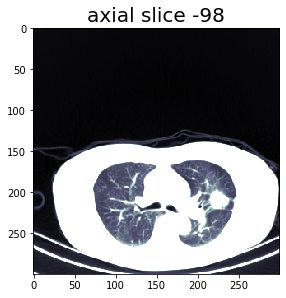

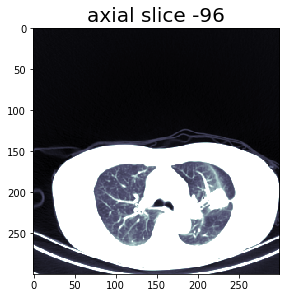

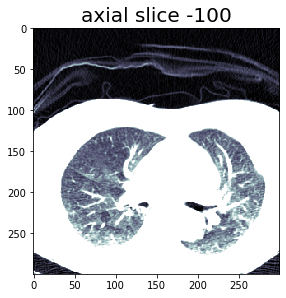

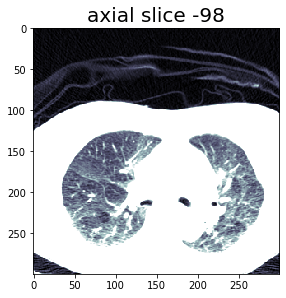

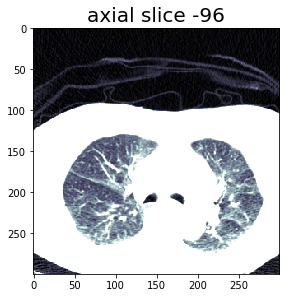

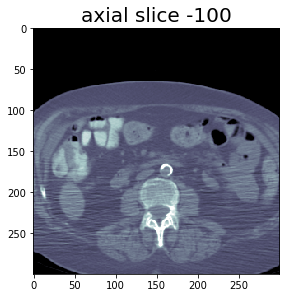

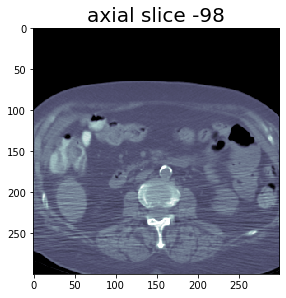

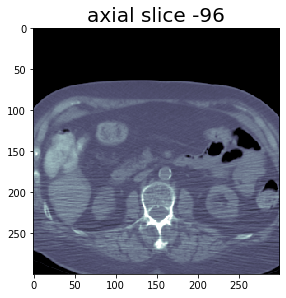

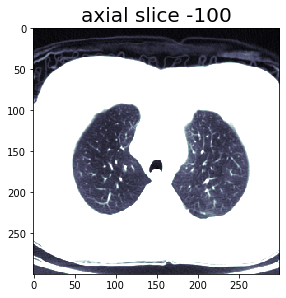

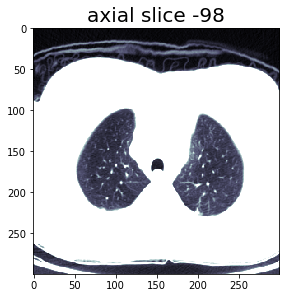

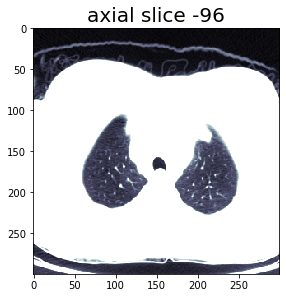

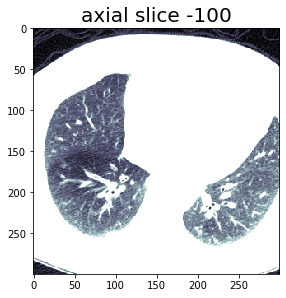

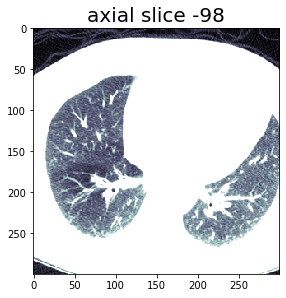

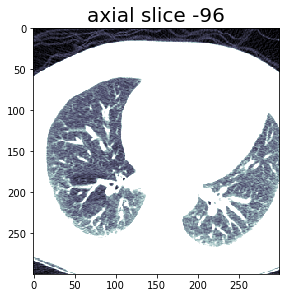

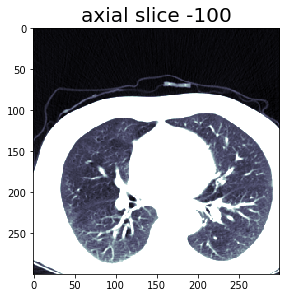

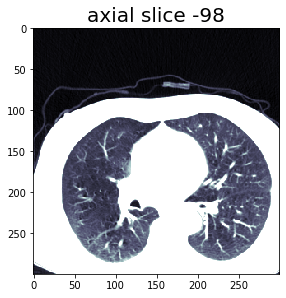

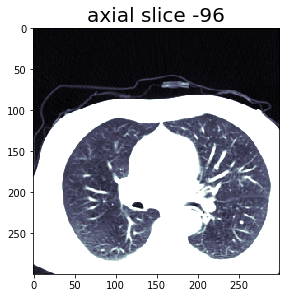

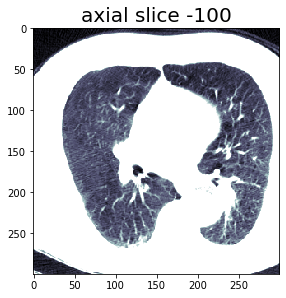

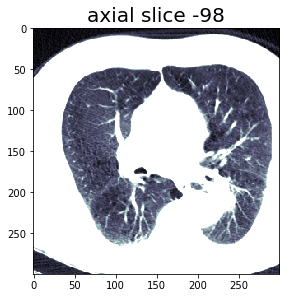

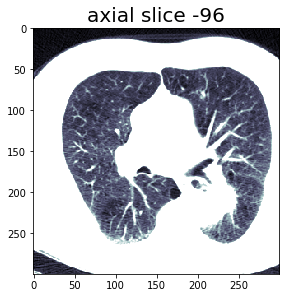

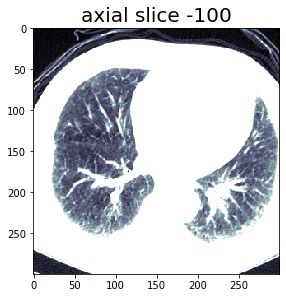

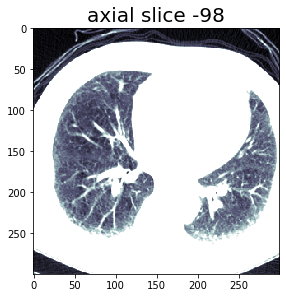

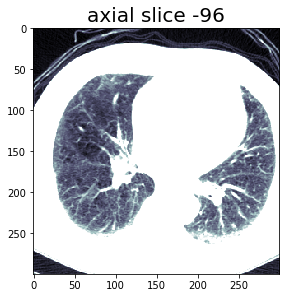

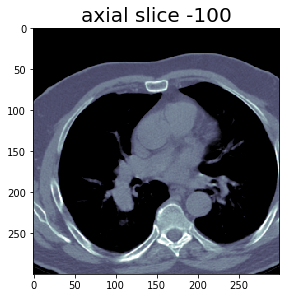

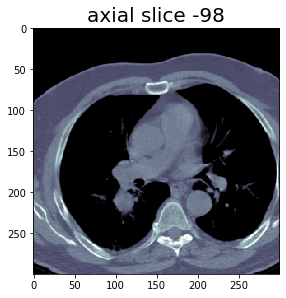

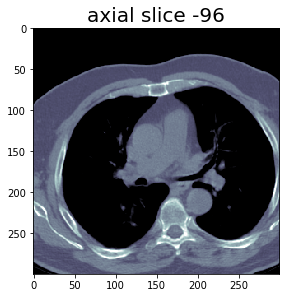

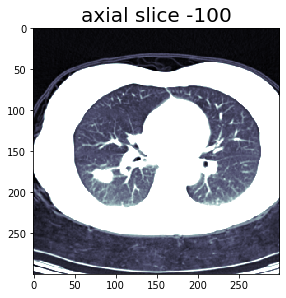

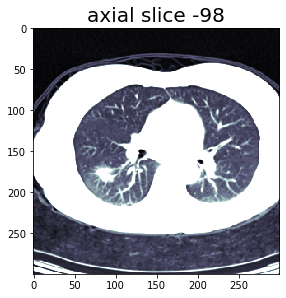

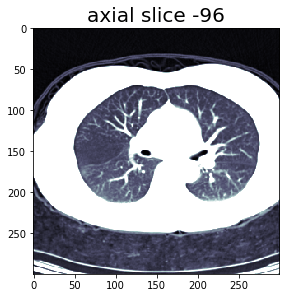

In [36]:
base = "Stanford_training"
base = "Stanford_testing"

hhlist= [105]
#for i in hhlist:
for i in range(1,167):
    patnr = str(i).zfill(3)
    image_num = "Lung-Stanford-{}".format(patnr)   
    
    axial, sagittal, coronal = -100, 100, 100
    rawdatadir = os.path.join(base, image_num)
    
    if not(os.path.isdir(rawdatadir)):
        continue 
    
    save_path = working_path = "data\\test\\{}".format(image_num)
      
    train_pats = set([*os.walk(os.path.join(rawdatadir))][0][1])
    print(train_pats)
    #test_pats = set([*os.walk(os.path.join(rawdatadir,'test'))][0][1])
    
    c_image = apply_window(Read_scan(os.path.join(rawdatadir)),400,40)
    # Visualizing Contrast enchanced vs non-contrast enchanced CT
    
    print(c_image.shape)
    
    smaple_img1 = c_image[axial,sagittal:sagittal+300,coronal:coronal+300]
    smaple_img2 = c_image[axial+2,sagittal:sagittal+300,coronal:coronal+300]
    smaple_img3 = c_image[axial+4,sagittal:sagittal+300,coronal:coronal+300]
    
    
    plt.figure(figsize=(15,15))
    plt.subplot(131)
    plt.title('axial slice {}'.format(axial),fontsize=20)
    plt.imshow(smaple_img1,cmap='bone')
    
    plt.figure(figsize=(15,15))
    plt.subplot(132)
    plt.title('axial slice {}'.format(axial+2),fontsize=20)
    plt.imshow(c_image[axial+2,sagittal:sagittal+300,coronal:coronal+300],cmap='bone')
    
    plt.figure(figsize=(15,15))
    plt.subplot(133)
    plt.title('axial slice {}'.format(axial+4),fontsize=20)
    plt.imshow(c_image[axial+4,sagittal:sagittal+300,coronal:coronal+300],cmap='bone')
    
    rgb_batch = np.concatenate((np.expand_dims(smaple_img1, axis=2), 
                                np.expand_dims(smaple_img2, axis=2),
                                np.expand_dims(smaple_img3, axis=2)),axis = 2)
    
    print(rgb_batch.shape)
    np.save(save_path+".npy", rgb_batch)
    imsave(save_path+".png",rgb_batch)

In [42]:
base = "Stanford_training"
#base = "Stanford_testing"

X_train = []
X_test = []
for i in range(1,167):
    patnr = str(i).zfill(3)
    image_num = "Lung-Stanford-{}".format(patnr)   
    rawdatadir = os.path.join(base, image_num)
    
    if not(os.path.isdir(rawdatadir)):
        continue 
    
    save_path = working_path = "data\\train\\numpy\\{}.npy".format(image_num)
    
    if not(os.path.isfile(save_path)):
        continue 
    work_numpy = np.load(save_path)
    work_numpy = (work_numpy - - work_numpy.mean())/np.std(work_numpy)
    X_train.append(work_numpy)

X_train= np.array(X_train)

print(X_train.min(), X_train.max())


0.021200817228698533 10.734188970789857


In [43]:
base = "Stanford_testing"

X_test = []
for i in range(1,167):
    patnr = str(i).zfill(3)
    image_num = "Lung-Stanford-{}".format(patnr)   
    rawdatadir = os.path.join(base, image_num)
    
    if not(os.path.isdir(rawdatadir)):
        continue 
    
    save_path = working_path = "data\\test\\numpy\\{}.npy".format(image_num)
    
    if not(os.path.isfile(save_path)):
        continue 
    work_numpy = np.load(save_path)
    work_numpy = (work_numpy - - work_numpy.mean())/np.std(work_numpy)
    X_test.append(work_numpy)
X_test= np.array(X_test)
print(X_test.min(), X_test.max())
X_all = np.concatenate((X_train, X_test), axis = 0)
print(X_all.shape)
X_test = (X_test - X_all.mean())/np.std(X_all)
X_train = (X_train - X_all.mean())/np.std(X_train)

print(X_test.min(), X_test.max())
print(X_train.min(), X_train.max())

-3.8935300319095014 5.976256533841004
(116, 300, 300, 3)
-4.379860003689148 1.3974849121288495
-2.296835300523127 4.600136973349757


In [44]:
np.save("X_train.npy", X_train)
np.save("X_test.npy", X_test)